<a href="https://colab.research.google.com/github/lkw0820/big_data_final/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

날짜별 온도별로 모기 밀집도 보여주기
애니매이션 넣어서

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (48.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


Text(0, 0.5, '밀집도')

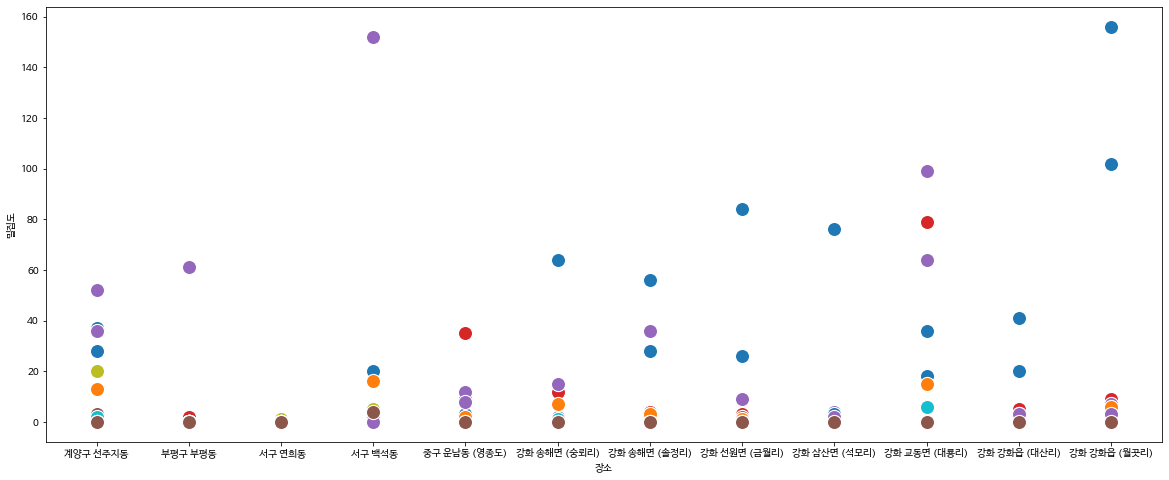

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

df = pd.read_csv('/content/인천광역시_보건환경연구원-모기밀도조사_20211231.csv', encoding = 'CP949', header=0)
#print(df)

#정렬

dfd=df.groupby(['연중주수'])
dfd.dtypes
df4=dfd.get_group('38주')

name=list(df4.columns.values)[4:]

#sns.set(rc={'figure.figsize':(20,8)})
fig, ax = plt.subplots(figsize=(20,8))
for i in name:
  sns.scatterplot(data=df4, x='장소',y=i, s=200)

ax.set_ylabel('밀집도')

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
plt.rc('font', family='NanumBarunGothic') 

df = pd.read_csv('/content/인천광역시_보건환경연구원-모기밀도조사_20211231.csv', encoding = 'CP949', header=0)
df1 = pd.read_csv('/content/인천ta_20221201172941.csv', encoding = 'CP949', header=0)
df2 = pd.read_csv('/content/강화ta_20221204010051.csv', encoding = 'CP949', header=0)

print('모기 종류: 얼룩날개모기류, 이나토미집모기, 반점날개집모기, 동양집모기, 빨간집모기, 작은빨간집모기')
print('           줄다리집모기, 노랑늪모기,반점날개늪모기, 흰줄숲모기, 금빛숲모기, 한국숲모기, 토고숲모기')
print('           등줄숲모기, 큰검정들모기, 금빛어깨숲모기기')
Text1 = input("모기 종류를 입력하세요: ")
Text2 = int(input("밀집도를 예측하고 싶은 온도를 입력하세요: "))


#print(df)
df['온도']=0
for i in np.arange(0,31): #30은 4월부터 10월까지 30주
  df['온도'].iloc[12*i:(12*i)+5] = df1['평균기온(℃)'].iloc[7*i:7*(i+1)].mean() #인천지역에 평균 온도
  df['온도'].iloc[5+(12*i):12+(12*i)] = df2['평균기온(℃)'].iloc[7*i:7*(i+1)].mean()#강화지역에 평균 온도

#df['온도'].iloc[0:5]=df1['평균기온(℃)'].iloc[0:6].mean()
#1-5 13-17 25-29 
#0-4 12-16 24-28 5-11 17-23 29-35
#12*i:(12*i)+5    5+(12*i):12+(12*i)
#print(df.head(20))
#print(df.tail(20))
fig = px.scatter(df, x='장소', y='온도', animation_frame='연중주수',range_y=[df['온도'].min(),df['온도'].max()], size=Text1)

fig.show()

모기 종류: 얼룩날개모기류, 이나토미집모기, 반점날개집모기, 동양집모기, 빨간집모기, 작은빨간집모기
           줄다리집모기, 노랑늪모기,반점날개늪모기, 흰줄숲모기, 금빛숲모기, 한국숲모기, 토고숲모기
           등줄숲모기, 큰검정들모기, 금빛어깨숲모기기
모기 종류를 입력하세요: 동양집모기
밀집도를 예측하고 싶은 온도를 입력하세요: 30


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


온도에 따른 모기 밀집도 예측 지역, 모기 종류에 따른 값을 x값으로 넣고 온도 값을 넣어서 학습 다음에는 테스트 학습셋 사용-> 교차 검증을 통해 예측값 정확하게 만든다

동양집모기
선형 회귀모델:  30 ℃ 일때 밀집도 예측:  [13.21005665]


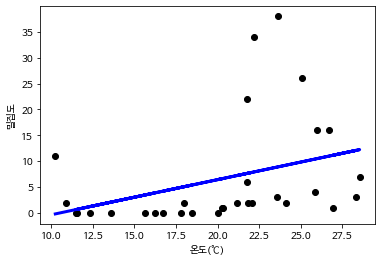

In [ ]:
import tensorflow as tf
from sklearn import linear_model

reg = linear_model.LinearRegression()
print(Text1)

#y= 밀집도 x = 온도
grouped=df.groupby(['장소'])
g1=grouped.get_group('계양구 선주지동')[Text1]
g2=grouped.get_group('계양구 선주지동')['온도']
x=np.array(g2).reshape(31,1) #온도
y=np.array(g1) #밀집도

#학습
reg.fit(x,y)
#예측값
print('선형 회귀모델: ',Text2, '℃ 일때 밀집도 예측: ',reg.predict([[Text2]]))

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(x, y, color='black')
plt.xlabel('온도(℃)')
plt.ylabel('밀집도')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(x)

# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(x, y_pred, color='blue', linewidth=3)		
plt.show()

학습셋과 테스트셋 사용

동양집모기
선형 회귀모델, 학습셋 테스트셋 사용용:  30 ℃ 일때 밀집도 예측:  [59.27998104]


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



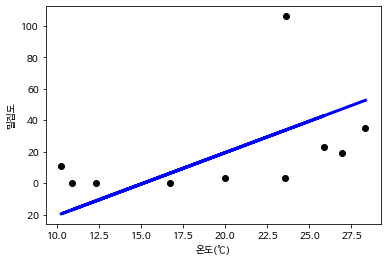

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split

reg = linear_model.LinearRegression()
print(Text1)

#x= 온도 y = 밀집도
grouped=df.groupby(['장소'])
g1=grouped.get_group('계양구 선주지동')['얼룩날개모기류']
#.drop(['온도','월','주','연중주수', '장소'], axis=1)
g2=grouped.get_group('계양구 선주지동')['온도']
y=np.array(g1)
x=np.array(g2).reshape(31,1)

#학습셋과 테스트셋 구분
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3)


#학습
reg.fit(X_train,Y_train)
#예측값
print('선형 회귀모델, 학습셋 테스트셋 사용용: ',Text2, '℃ 일때 밀집도 예측: ',reg.predict([[Text2]]))


# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X_test, Y_test, color='black')
plt.xlabel('온도(℃)')
plt.ylabel('밀집도')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X_test)

#학습 데이터와 예측값으로 선그래프로 그린다. 
#계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(X_test, y_pred, color='blue', linewidth=3)		
plt.show()


딥러닝, 교차검증 X

In [ ]:
print('교차검증 X')
#딥러닝모델
model1 = Sequential()
model1.add(Dense(2,input_dim=1,activation='relu'))
model1.add(Dense(1,activation='relu'))
model1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train,Y_train, epochs=30, batch_size=1)


교차검증 X
Epoch 1/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 - accuracy: 0.3810
Epoch 2/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 - accuracy: 0.3810
Epoch 3/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 - accuracy: 0.3810
Epoch 4/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 - accuracy: 0.3810
Epoch 5/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 - accuracy: 0.3810
Epoch 6/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 - accuracy: 0.3810
Epoch 7/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 - accuracy: 0.3810
Epoch 8/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 - accuracy: 0.3810
Epoch 9/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 - accuracy: 0.3810
Epoch 10/30
21/21 [==============================] - 0s 1ms/step - loss: 1100.1904 -

딥러닝 사용, 교차검증 X, 학습셋 테스트셋으로 나눈것 그래프

1/1 [==============================] - 0s 45ms/step
딥러닝 모델, 교차검증X, 학습셋 테스트셋 나눔눔:  30 ℃ 일때 밀집도 예측:  [[0.]]
1/1 [==============================] - 0s 18ms/step


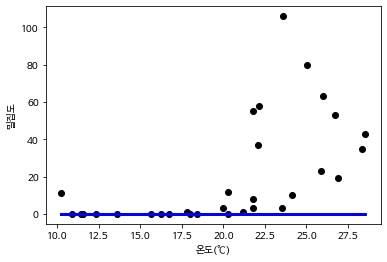

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
#예측값
print('딥러닝 모델, 교차검증X, 학습셋 테스트셋 나눔눔: ',Text2, '℃ 일때 밀집도 예측: ', model1.predict([[Text2]]))

y_pred = model1.predict(x)
plt.scatter(x, y, color='black')
# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('온도(℃)')
plt.ylabel('밀집도')		
plt.show()
#x.shape
#print(x)
#y_pred.shape
print(y_pred)

딥러닝, 교차검증 O

In [ ]:
from sklearn.model_selection import StratifiedKFold

print('교차검증 O')
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracy=[]
for train, test in skf.split(x,y):
  model2 = Sequential()
  model2.add(Dense(2,input_dim=1,activation='relu'))
  model2.add(Dense(1,activation='relu'))
  model2.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['accuracy'])

  model2.fit(x[train], y[train],  epochs=30, batch_size=1)
  k_accuracy = "%.4f"%(model2.evaluate(x[test],y[test])[1])
  accuracy.append(k_accuracy)


print('정확도: ',accuracy)

교차검증 O
Epoch 1/30


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



27/27 [==============================] - 0s 1ms/step - loss: 1282.3704 - accuracy: 0.3333
Epoch 2/30
27/27 [==============================] - 0s 1ms/step - loss: 1282.3704 - accuracy: 0.3333
Epoch 3/30
27/27 [==============================] - 0s 997us/step - loss: 1282.3704 - accuracy: 0.3333
Epoch 4/30
27/27 [==============================] - 0s 1ms/step - loss: 1282.3704 - accuracy: 0.3333
Epoch 5/30
27/27 [==============================] - 0s 1ms/step - loss: 1282.3704 - accuracy: 0.3333
Epoch 6/30
27/27 [==============================] - 0s 1ms/step - loss: 1282.3704 - accuracy: 0.3333
Epoch 7/30
27/27 [==============================] - 0s 1ms/step - loss: 1282.3704 - accuracy: 0.3333
Epoch 8/30
27/27 [==============================] - 0s 1ms/step - loss: 1282.3704 - accuracy: 0.3333
Epoch 9/30
27/27 [==============================] - 0s 1ms/step - loss: 1282.3704 - accuracy: 0.3333
Epoch 10/30
27/27 [==============================] - 0s 1ms/step - loss: 1282.3704 - accuracy: 0.333

딥러닝, 교차검증 후 예측값 표시

1/1 [==============================] - 0s 47ms/step


딥러닝모델, 교차검증 O, 테스트셋 학습셋 나눔:  30 ℃ 일때 밀집도 예측:  [[33.156414]]
1/1 [==============================] - 0s 37ms/step


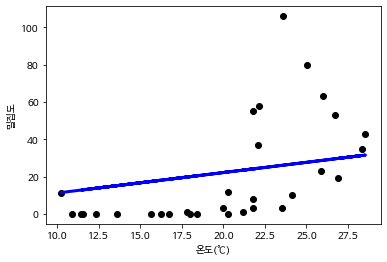

[[15.153494 ]
 [12.8952875]
 [12.816878 ]
 [18.038979 ]
 [13.757797 ]
 [17.396019 ]
 [20.469687 ]
 [18.60353  ]
 [19.952177 ]
 [22.461296 ]
 [24.107906 ]
 [23.464947 ]
 [26.083834 ]
 [26.726797 ]
 [28.62432  ]
 [31.32162  ]
 [29.769102 ]
 [31.556849 ]
 [29.518192 ]
 [28.749775 ]
 [27.730442 ]
 [26.146564 ]
 [24.562683 ]
 [24.107906 ]
 [24.437225 ]
 [24.170633 ]
 [22.179022 ]
 [22.508343 ]
 [19.763996 ]
 [12.20528  ]
 [11.4682255]]


In [ ]:
#예측값
print('딥러닝모델, 교차검증 O, 테스트셋 학습셋 나눔: ',Text2, '℃ 일때 밀집도 예측: ',model2.predict([[Text2]]))
y_pred = model2.predict(x)
plt.scatter(x, y, color='black')
# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(x, y_pred, color='blue', linewidth=3)		
plt.xlabel('온도(℃)')
plt.ylabel('밀집도')
plt.show()
#x.shape
#print(x)
#y_pred.shape
print(y_pred)